## MCMC
---

### Cores
- **WHAT** it is
  - Method to sample from an *arbitrary* distribution using the properties of Markov Chain.
- **WHEN** to use
  - Approximating a *full* posterior distribution<sup>cf.Variational Bayes</sup>
- **Rationale**
  - Markov Chain : A stationary Markov Chain
  - After some *burn-in*, the MC converges to the stationary distribution. Thus, long-run equilibrium time spent at each point($\pi_i$) is approximately equal to the height(density) of the distribution.
- **Pros** for MCMC
  - Scalable w.r.t the dimensionality of the sample space.<sup>[1]</sup>
- **Cons** for MCMC:?
- **Remarks** on proposal width
  - Choice of proposed distribution, and thus proposal width affects the performance. Often, Gaussian distribution with mean at the current position is chosen. In this case, variance of the proposed distribution works as the proposal width. Empirical optimization is commonly adopted for deciding the proposal width.
- **Libraries**
  - Python : PyMC
  - R : ?
---

### Theories

#### Notes on Markov Chains
- Definition of 1st order MC<sup>[2]</sup>
  - A sequence of random variables $\{X_n,n\ge0\}$ is a **Discrete Time Markov Chain** on state space $S$ if
    1. $\forall n\ge0,X_n\in S$
    2. $\forall i,j,P[X_{n+1}=j|X_n=i,X_{n-1}=i_{n-1},...X_0=i_0]=P[X_{n+1}=j|X_n=i]=P_{ij}$
  - A process $\{X(t),t\ge0\}$ is a **Continuous Time Markov Chain** on state space $S$ if
    $$\begin{eqnarray}
    &&\forall s,t\ge0,\quad i,j,x(u)\in S, \quad 0\le u < s\notag\\
    &&P[X(t+s)=j|X(s)=i,X(u)=x(u),0\le u < s]=P[X(t+s)=j|X(s)=i]\notag\\
    \end{eqnarray}$$
- Desirable properties of a MC
  - **Stationarity(Invarinace)**
    - $\pi_i=\sum_j{P_{ji}\pi_j}$ is the *long-run equilibrium time spent on each state.*
  - (Time-)Reversible MC and detailed balance equation
    - An MC that satisfies the detailed balance equation $\pi_iP_{ij}=\pi_jP_{ji}$ is reversible.
    - **A reversible MC is stationary**
  - Ergodicity : the MC converges to the stationary distribution as $n\rightarrow\infty$

#### Metropolis-Hastings Algorithm
- How it works : make the desired distribution $\pi(.)$ to draw samples from as the stationary distribution of a reversible MC.
- Logical flow(Rough): The detailed balance equation is satisfied -> MC is stationary -> Portion of times spent at each state(time) follows the proposed distribution.
- Algorithm
  1. Initialize $X_1$
  2. Generate $X_{n+1}(n=1,2,...)$ by the following steps:
    - Generate $X_{n+1}'=x_j$ from $P(X_{n+1}=x_j|X_n=x_i)=q_{ij}$, *any* reversible transition probability for MC. Often, it is $\mathcal{N}(\mu=x_i,\sigma^2)$, where the proposal width $\sigma$ is your choice..
    - Define the *acceptance probability*: $a(i,j)=\min{\left(1,{\pi(X_{n+1}')q(X_n|X_{n+1}')\over\pi(X_n)q(X_{n+1}'|X_n)}\right)}=\min{\left(1,{\pi_jq_{ji}\over\pi_iq_{ij}}\right)}$
    - Take $X_{n+1}\begin{cases}X_{n+1}'\text{ with }q_{ij}a(i,j)\\X_n\text{ otherwise(stays at current state)}\end{cases}$
  3. Iterate step 1,2.
  3. Result : $\{X_n\}$ is a MC with stationary distribution $\pi_j$
- Proof : Lecture Note & page 248 of [1]

#### Gibbs-Sampling
- Widely used version of Metropolis-Hastings Algorithm for multi-dimensional sampling.
- Sequential sampling. Details on pg 250 of [1]

---

### Example Codes with dummy data

In [22]:
## Import necessary libraries
%matplotlib inline
import pymc as pm
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import daft

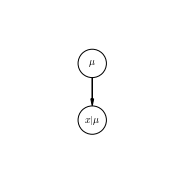

In [50]:
# Visualize the model
model = daft.PGM([3,3]) #[5,5] is the size of the PGM
model.add_node(daft.Node("mu",r"$\mu$",1.5,2)) #2.5=x-coordinate, 1=y-coordinate
model.add_node(daft.Node("x",r"$x|\mu$",1.5,1))
model.add_edge("mu","x")
model.render()

In [97]:
# True mu(unknown)
mu_true = 2
# prior
mu_prior = pm.Uniform("mu",0,5)
# generate the dummy data created from the true parameter
population = pm.Normal("sample",mu_true,4)
samples = [population.random() for i in xrange(100)]
# Integrate data into the prior
data = pm.Normal("data",mu_prior, value=samples, observed=True)
# Construct an MCMC and sample from the posterior
posteriorMC = pm.MCMC([mu_prior,data])
posteriorMC.sample(20000,2000)

 [-----------------100%-----------------] 20000 of 20000 complete in 0.8 sec

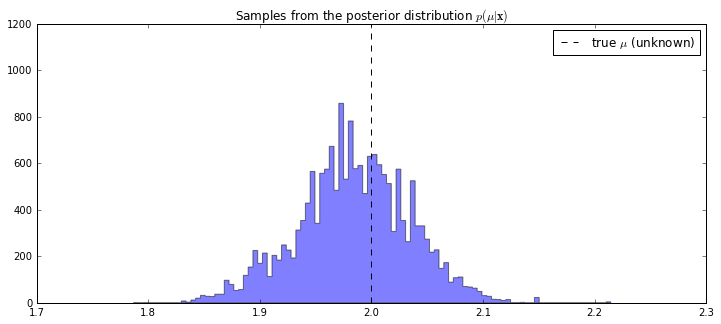

In [98]:
figsize(12,5)
plt.hist(posteriorMC.trace("mu")[:], bins=100, histtype="stepfilled",alpha=0.5)
plt.title("Samples from the posterior distribution $p(\mu|\mathbf{x})$")
plt.vlines(mu_true, 0, 1200, linestyle="--", label="true $\mu$ (unknown)")
plt.legend()

Note that the probability is high near the true value $2$.

### Reference  
[1] Sheldon M. Ross(11e). Introduction to Probability Models.  
[2] Bishop(2006), Pattern Recognition and Machine Learning. Chapter 11.2 - Markov Chain Monte Carlo  